In [2]:
import json
import os

import matplotlib.pyplot as plt
import hiplot as hip
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
os.listdir('../data')

['merged_folds.csv',
 'toxicity_annotated_comments.tsv',
 '.DS_Store',
 'entropy.csv',
 'folded_aggresion.csv',
 '__pycache__',
 'docs_for_embeddings.json',
 'aggression_annotations.tsv',
 'toxicity_annotations.tsv',
 'aggression_annotated_comments.tsv',
 'attack_worker_demographics.tsv',
 'toxicity_worker_demographics.tsv',
 'folded_aggresion_40.csv',
 'attack_annotated_comments.tsv',
 'aggression_worker_demographics.tsv',
 'attack_annotations.tsv',
 'data.py']

In [3]:
entropy = pd.read_csv('../data/entropy.csv')

In [4]:
len(entropy)

115861

In [5]:
entropy_d = {k: v for k, v in zip(entropy.rev_id, entropy.entropy)}

In [6]:
len(entropy_d)

115861

In [4]:
merged_folds = pd.read_csv('../data/merged_folds.csv')

In [8]:
#preparing mainstream
mainstream = merged_folds[['worker_id', 'fold', 'agg_prc_mainstream', 'n_agg_prc_mainstream', 'overall_prc_mainstream']].drop_duplicates()
mainstream_dict = {w: m for w, m in zip(mainstream.worker_id, mainstream.overall_prc_mainstream)}

In [9]:
weighted_mainstream = merged_folds[['worker_id', 'fold', 'w_agg_prc_mainstream', 'w_n_agg_prc_mainstream', 'w_overall_prc_mainstream']].drop_duplicates()

In [10]:
with open('../data/docs_for_embeddings.json') as file:
    docs = json.load(file)

In [11]:
data_docs = []
for user, doc_dict in docs.items():
    
    res = {f'd{i}': entropy_d[document] for i, document in enumerate(doc_dict['controversial'][:10])}
    res['mainstream'] = mainstream_dict[int(user)]
    data_docs.append(res)

In [12]:
aggression_docs = []
for user, doc_dict in docs.items():
    user_data = merged_folds[merged_folds.worker_id==int(user)][['rev_id', 'aggression']]
    user_data = {k: v for k,v in zip(user_data.rev_id, user_data.aggression)}
    res = {f'd{i}': user_data[document] for i, document in enumerate(doc_dict['controversial'][:10])}
    aggression_docs.append(res)

In [13]:
len(data_docs)

2450

In [14]:
dis = hip.Experiment.from_iterable(data_docs)
dis.parameters_definition["d0"].force_range(0, 1)
dis.parameters_definition["d1"].force_range(0, 1)

dis.display()

<IPython.core.display.Javascript object>

In [15]:
averages = mainstream.groupby('fold').mean().reset_index()

In [16]:
averages

,fold,worker_id,agg_prc_mainstream,n_agg_prc_mainstream,overall_prc_mainstream
0,1,1594.755102,0.767665,0.899854,0.885645
1,2,1603.959184,0.754499,0.904870,0.887312
2,3,1537.644898,0.764583,0.893321,0.880816
3,4,1526.485714,0.753517,0.899740,0.883477
4,5,1530.093878,0.764830,0.908203,0.891170
5,6,1700.975510,0.749645,0.897240,0.880434
6,7,1801.559184,0.760707,0.889059,0.873698
7,8,1567.685714,0.751875,0.905520,0.888416
8,9,1707.220408,0.744679,0.899587,0.881486
9,10,1648.763265,0.771020,0.901955,0.885648


Text(0, 0.5, 'Avg [%]')

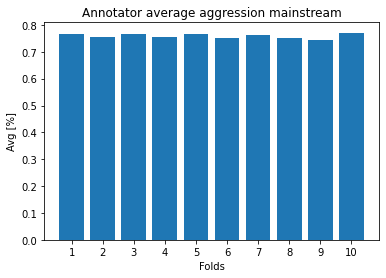

In [17]:
plt.title('Annotator average aggression mainstream')
plt.bar(averages.fold, averages.agg_prc_mainstream)
plt.xticks(averages.fold)
plt.xlabel('Folds')
plt.ylabel('Avg [%]')

Text(0, 0.5, 'Avg [%]')

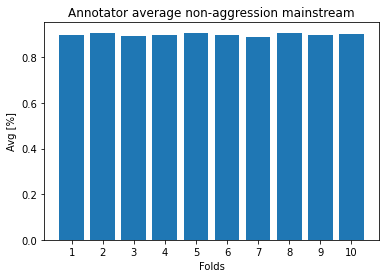

In [18]:
plt.title('Annotator average non-aggression mainstream')
plt.bar(averages.fold, averages.n_agg_prc_mainstream)
plt.xticks(averages.fold)
plt.xlabel('Folds')
plt.ylabel('Avg [%]')

Text(0, 0.5, 'Avg [%]')

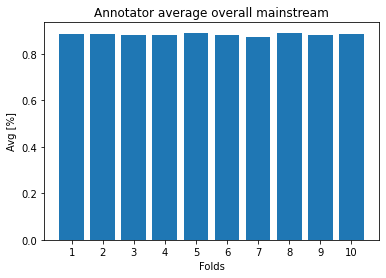

In [19]:
plt.title('Annotator average overall mainstream')
plt.bar(averages.fold, averages.overall_prc_mainstream)
plt.xticks(averages.fold)
plt.xlabel('Folds')
plt.ylabel('Avg [%]')

Text(0, 0.5, 'Annotators #')

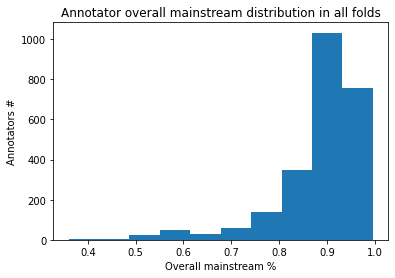

In [20]:
plt.title('Annotator overall mainstream distribution in all folds')
plt.hist(mainstream.overall_prc_mainstream)
plt.xlabel('Overall mainstream %')
plt.ylabel('Annotators #')

Text(0, 0.5, 'Annotators #')

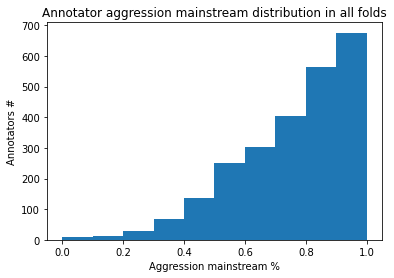

In [21]:
plt.title('Annotator aggression mainstream distribution in all folds')
plt.hist(mainstream.agg_prc_mainstream)
plt.xlabel('Aggression mainstream %')
plt.ylabel('Annotators #')

Text(0, 0.5, 'Annotators #')

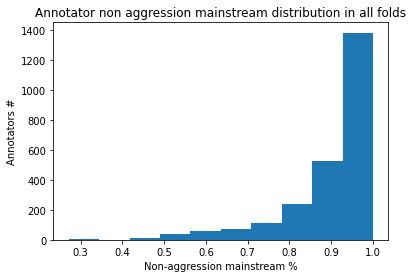

In [22]:
plt.title('Annotator non aggression mainstream distribution in all folds')
plt.hist(mainstream.n_agg_prc_mainstream)
plt.xlabel('Non-aggression mainstream %')
plt.ylabel('Annotators #')

Text(0, 0.5, 'Annotators #')

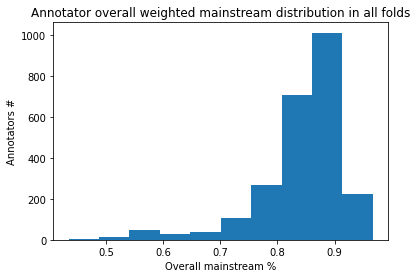

In [23]:
plt.title('Annotator overall weighted mainstream distribution in all folds')
plt.hist(weighted_mainstream.w_overall_prc_mainstream)
plt.xlabel('Overall mainstream %')
plt.ylabel('Annotators #')

Text(0, 0.5, 'Annotators #')

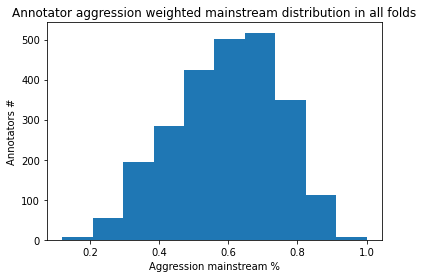

In [24]:
plt.title('Annotator aggression weighted mainstream distribution in all folds')
plt.hist(weighted_mainstream.w_agg_prc_mainstream)
plt.xlabel('Aggression mainstream %')
plt.ylabel('Annotators #')

Text(0, 0.5, 'Annotators #')

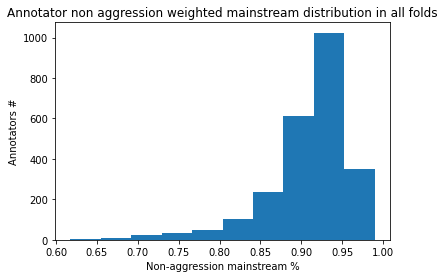

In [25]:
plt.title('Annotator non aggression weighted mainstream distribution in all folds')
plt.hist(weighted_mainstream.w_n_agg_prc_mainstream)
plt.xlabel('Non-aggression mainstream %')
plt.ylabel('Annotators #')

In [26]:
aggresive_number = [sum(docs.values()) for docs in aggression_docs]

In [32]:
aggresive_prc = {f'd{i+1}': sum([d[f'd{i}'] for d in aggression_docs])/len(aggression_docs) for i in range(10)}
aggresive_prc

{'d1': 0.5134693877551021,
 'd2': 0.4816326530612245,
 'd3': 0.49020408163265305,
 'd4': 0.4526530612244898,
 'd5': 0.45183673469387753,
 'd6': 0.43387755102040815,
 'd7': 0.40244897959183673,
 'd8': 0.4036734693877551,
 'd9': 0.4,
 'd10': 0.3673469387755102}

Text(0, 0.5, '% of aggresive documents')

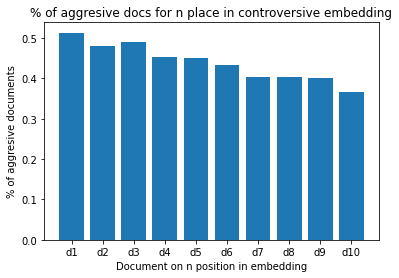

In [30]:
plt.title('% of aggresive docs for n place in controversive embedding')
plt.bar(aggresive_prc.keys(), aggresive_prc.values())
plt.xticks(list(aggresive_prc.keys()))
plt.xlabel('Document on n position in embedding')
plt.ylabel('% of aggresive documents')

Text(0, 0.5, 'Annotators #')

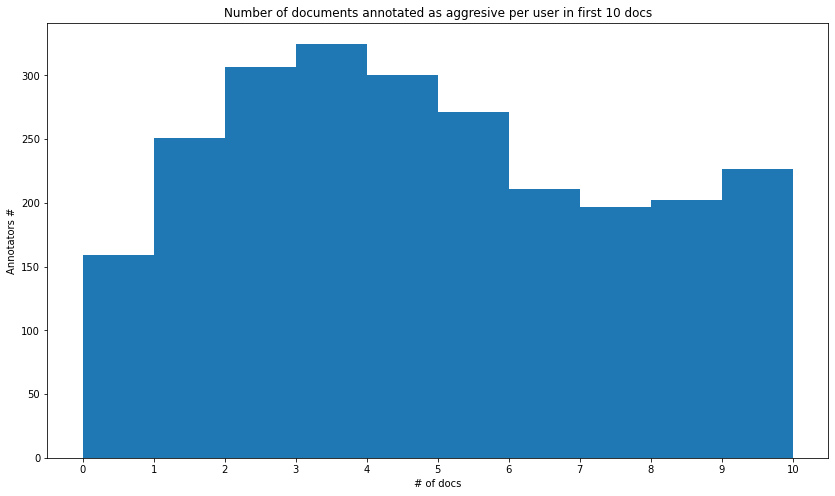

In [34]:
plt.figure(figsize=(14,8))
plt.title('Number of documents annotated as aggresive per user in first 10 docs')
plt.hist(aggresive_number)
plt.xticks(list(range(11)))
plt.xlabel('# of docs')
plt.ylabel('Annotators #')

In [6]:
merged_folds.columns

Index(['rev_id', 'worker_id', 'aggression', 'aggression_score', 'fold',
       'comment', 'year', 'logged_in', 'ns', 'sample', 'split', 'p_aggressive',
       'entropy', 'num_annotations', 'majority', 'is_decision_major',
       'agg_prc_mainstream', 'n_agg_prc_mainstream', 'overall_prc_mainstream',
       'w_agg_prc_mainstream', 'w_n_agg_prc_mainstream',
       'w_overall_prc_mainstream'],
      dtype='object')

Text(0, 0.5, 'Document controversy')

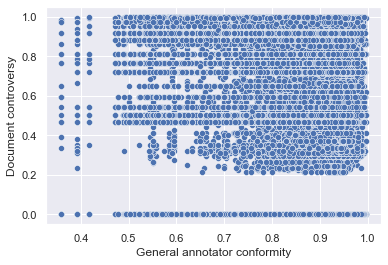

In [9]:
sns.scatterplot(data=merged_folds[merged_folds.split == 'dev'], x="overall_prc_mainstream", y="entropy")
plt.xlabel('General annotator conformity')
plt.ylabel('Document controversy')

Text(0, 0.5, 'Document controversy')

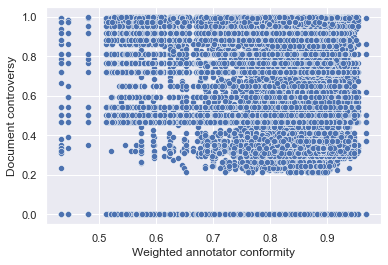

In [10]:
sns.scatterplot(data=merged_folds[merged_folds.split == 'dev'], x="w_overall_prc_mainstream", y="entropy")
plt.xlabel('Weighted annotator conformity')
plt.ylabel('Document controversy')

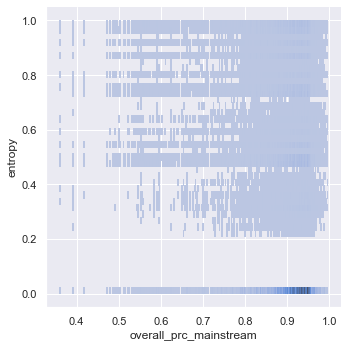

In [11]:
sns.displot(data=merged_folds[merged_folds.split == 'dev'], x="overall_prc_mainstream", y="entropy")

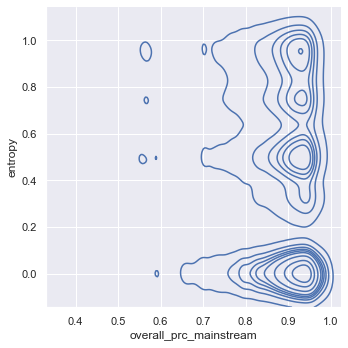

In [12]:
sns.displot(data=merged_folds[merged_folds.split == 'dev'], x="overall_prc_mainstream", y="entropy", kind='kde')